In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("sales_data.csv", encoding="ISO-8859-1")  # Adjust encoding if needed

In [3]:
# Display basic info and first few rows
print(df.info())  # Check data types and missing values
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED 

In [4]:
# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [5]:
# Drop rows with missing CustomerID (only if necessary)
df = df.dropna(subset=["CustomerID"])

In [6]:
# Remove negative quantities (handling returns separately if needed)
df = df[df["Quantity"] > 0]

In [7]:
# Drop duplicate transactions
df = df.drop_duplicates()

print("Dataset cleaned successfully!")

Dataset cleaned successfully!


In [8]:
# Aggregate daily sales
df["Date"] = df["InvoiceDate"].dt.date
daily_sales = df.groupby("Date")["Quantity"].sum()

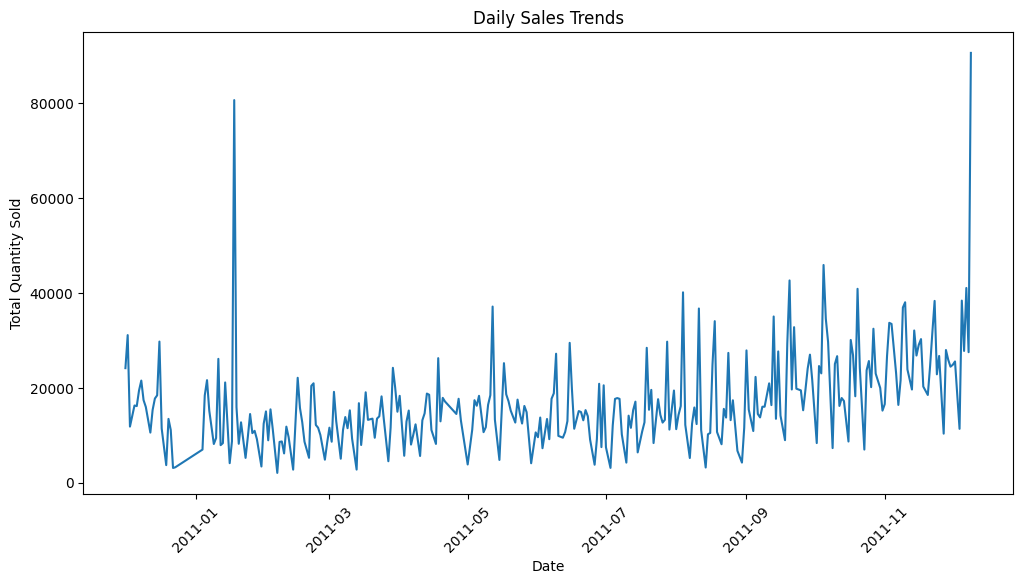

In [9]:
# Plot sales trends
plt.figure(figsize=(12, 6))
daily_sales.plot(title="Daily Sales Trends", xlabel="Date", ylabel="Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

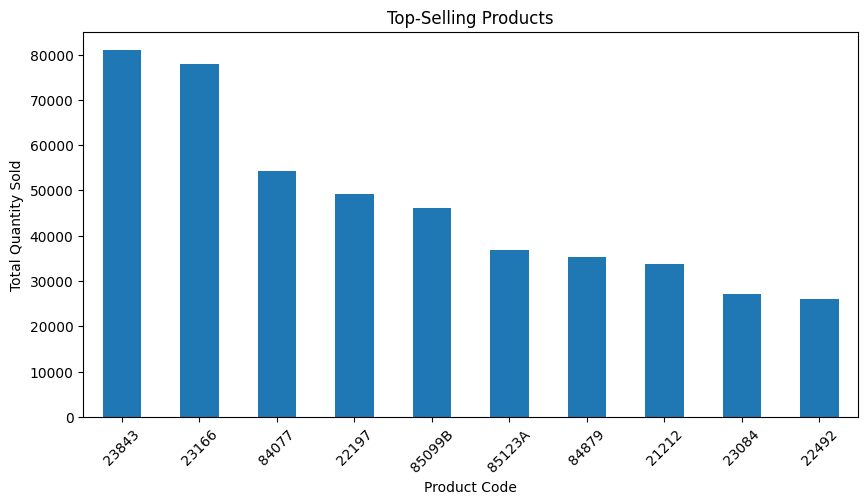

In [10]:
top_products = df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", title="Top-Selling Products", xlabel="Product Code", ylabel="Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

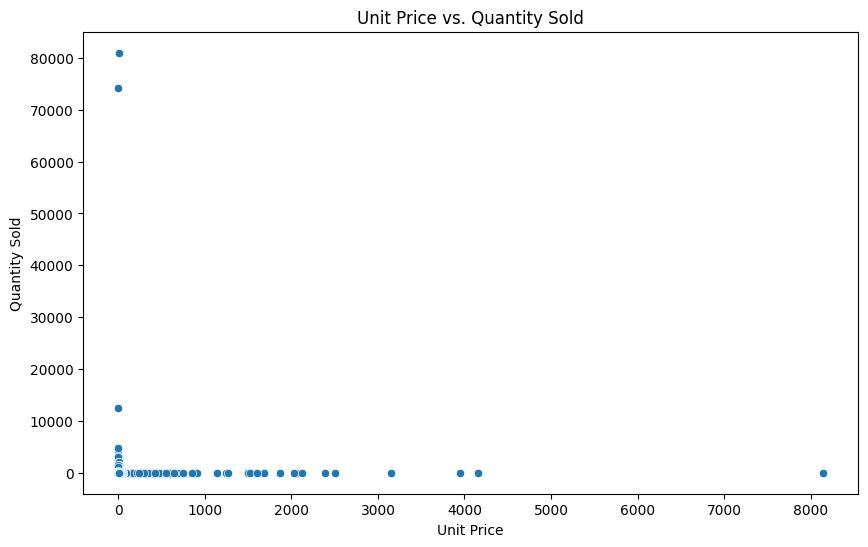

In [11]:
# Scatter plot to visualize price vs. quantity sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["UnitPrice"], y=df["Quantity"])
plt.title("Unit Price vs. Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.show()

In [12]:
# Compute correlation
price_quantity_corr = df["UnitPrice"].corr(df["Quantity"])
print(f"Correlation between Unit Price and Quantity Sold: {price_quantity_corr:.2f}")

Correlation between Unit Price and Quantity Sold: -0.00


In [13]:
# Group products by StockCode and analyze average price and total quantity sold
product_pricing = df.groupby("StockCode").agg({"UnitPrice": "mean", "Quantity": "sum"}).sort_values(by="Quantity", ascending=False)

In [14]:
# Display top products
print(product_pricing.head(10))

           UnitPrice  Quantity
StockCode                     
23843       2.080000     80995
23166       1.220303     77916
84077       0.292606     54319
22197       0.839208     49160
85099B      2.015969     46078
85123A      2.892768     36763
84879       1.680710     35263
21212       0.548181     33670
23084       2.012770     27153
22492       0.656523     26076


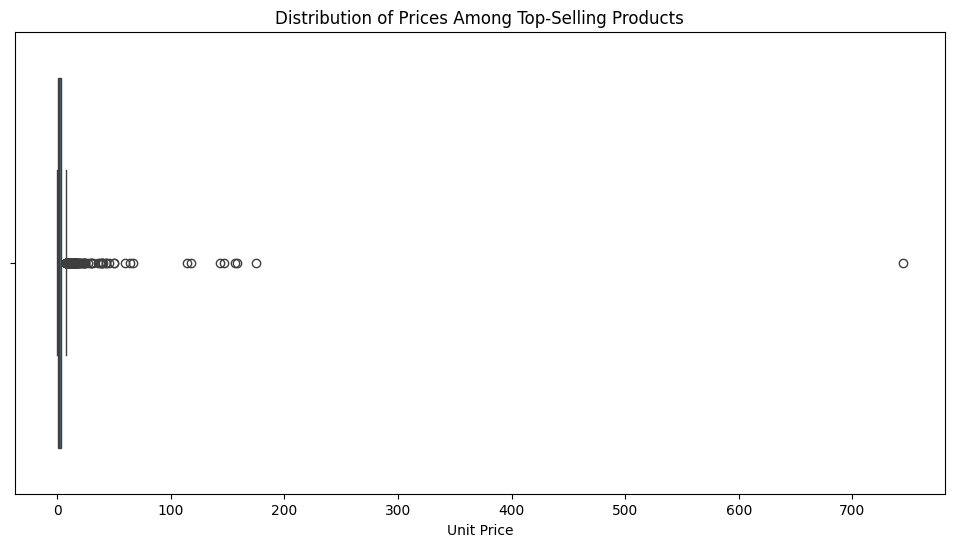

In [15]:
# Plot Unit Price distribution of best-selling products
plt.figure(figsize=(12, 6))
sns.boxplot(x=product_pricing["UnitPrice"])
plt.title("Distribution of Prices Among Top-Selling Products")
plt.xlabel("Unit Price")
plt.show()

In [16]:
# Calculate correlation again but only for top-selling products
top_selling_products = product_pricing.head(50)
correlation = top_selling_products["UnitPrice"].corr(top_selling_products["Quantity"])
print(f"Correlation between Price and Sales for Top Products: {correlation:.2f}")

Correlation between Price and Sales for Top Products: -0.07


In [17]:
# Extract month from InvoiceDate
df["Month"] = df["InvoiceDate"].dt.to_period("M")

In [18]:
# Aggregate sales per month
monthly_sales = df.groupby("Month")["Quantity"].sum()

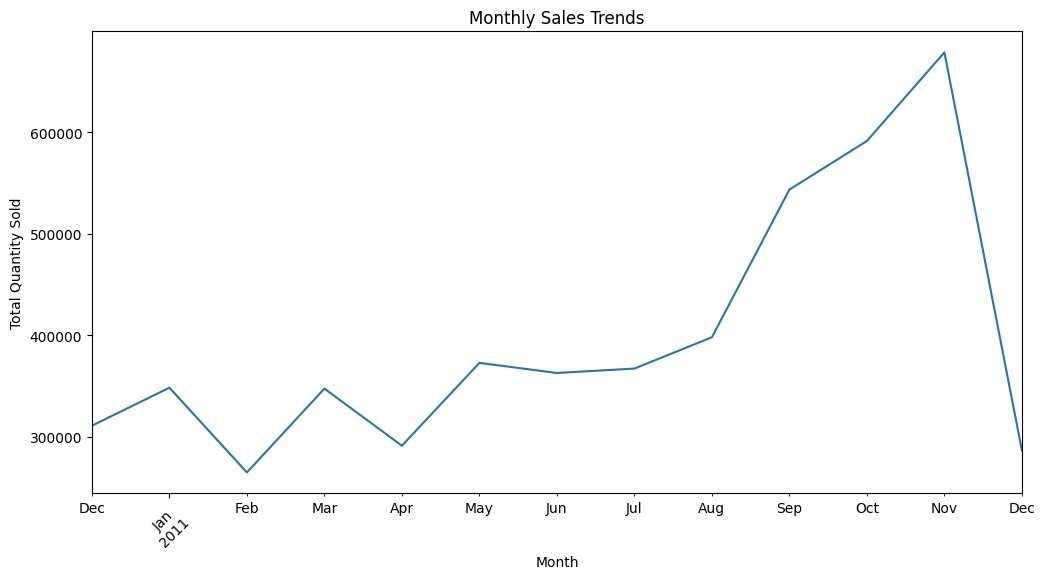

In [19]:
# Plot sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(title="Monthly Sales Trends", xlabel="Month", ylabel="Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Group by Description and compute correlation for each product type
product_group = df.groupby("Description").agg({"UnitPrice": "mean", "Quantity": "sum"})
product_corr = product_group["UnitPrice"].corr(product_group["Quantity"])

print(f"Correlation between Price and Sales for Different Product Types: {product_corr:.2f}")

Correlation between Price and Sales for Different Product Types: -0.04


In [21]:
# Create a new column indicating whether a product has a lower-than-average price
df["Discounted"] = df["UnitPrice"] < df["UnitPrice"].mean()

In [22]:
# Compare quantity sold for discounted vs. non-discounted items
discount_sales = df.groupby("Discounted")["Quantity"].sum()
print(discount_sales)

Discounted
False     607281
True     4558605
Name: Quantity, dtype: int64


In [23]:
# Calculate average quantity sold for discounted vs. non-discounted items
avg_sales = df.groupby("Discounted")["Quantity"].mean()
print(avg_sales)

Discounted
False     5.641988
True     15.989719
Name: Quantity, dtype: float64
